<a href="https://colab.research.google.com/github/Jordan-Ireland/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

myList = [50,42,29,75,50,82]

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

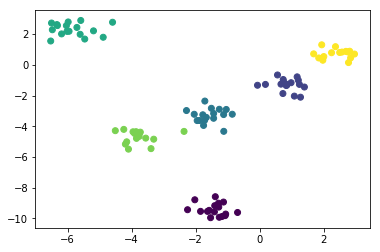

In [61]:
# TODO - your code here
# Use what we did live in lecture as an example

##import what libs needed
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import numpy as np

##create a fake dataset. centers = how many clusters there are, clusters_std = how spread out they are
##random_state = an int that acts like a seed??
X, Y = datasets.make_blobs(centers=6, cluster_std=.4, random_state=2)

##make a scatter plot with the data split down column 0 and 1 for X and Y
##then set a color based off of make_blobs(y)
plt.scatter(X[:,0],X[:,1], c=Y);


[[ 0.84434157 -1.30502122]
 [-3.8864559  -4.71631507]
 [-5.84456113  2.30859089]
 [-1.41542123 -9.42698544]
 [ 2.36662512  0.70174419]
 [-1.60987038 -3.35853504]]


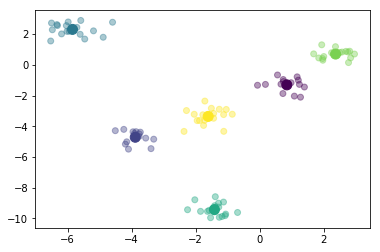

In [62]:
##import KMeans
from sklearn.cluster import KMeans

##kmeans == how many colors?? and random state is a seed type thing
##.fit takes a matrix and labels gets each points label?
kmeans = KMeans(6,random_state=2)
Y_Hat = kmeans.fit(X).labels_

##make a new scatter plot with same points, but random color order??
plt.scatter(X[:,0],X[:,1], c=Y_Hat, alpha=0.4);

##cluster_centers finds the average in each cluster and makes a new matrix
mu = kmeans.cluster_centers_

##make a new scatter plot with the center on them and then print the center matrix for visual info
plt.scatter(mu[:,0],mu[:,1],s=100,c=np.unique(Y_Hat))
print(mu)

In [0]:
##I had to edit some of the code from the original to get this working
##importing hand drawn numbers from openml.org
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

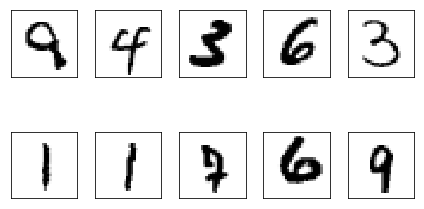

In [184]:
##making a new array with the data of the dataset
X_digits = []
for i in mnist.data:
  X_digits.append(i)
  
##taking the last instances of the data (to make it run quicker)
X_digits = X_digits[-6000:]
  
#choosing some random numbers to show what the data set consist of and "plotting" x and y axes to make an image
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_digits[i].reshape(28,28))
  plt.xticks(())
  plt.yticks(())
plt.tight_layout()

In [0]:
##setting howmany new images wil be
kmeans = KMeans(20)

In [0]:
##finding the "cetners" of the clusters to make new ones
mu_digits = kmeans.fit(X_digits).cluster_centers_

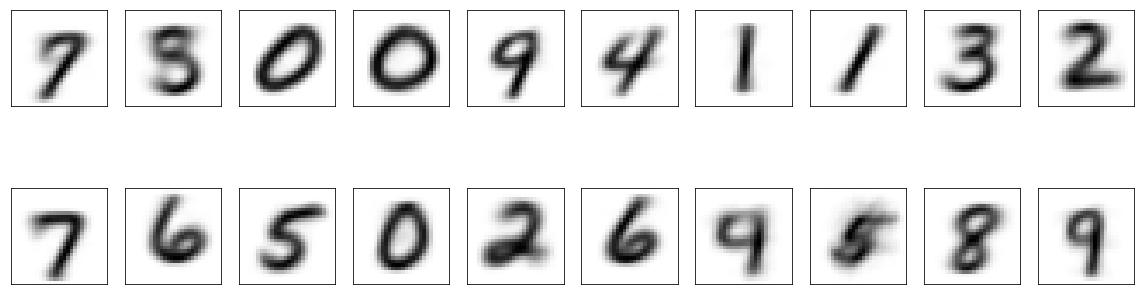

In [189]:
##doing the same as above, but with the new data
plt.figure(figsize=(16,6))
for i in range(2*(mu_digits.shape[0]//2)): # loop over all means
    plt.subplot(2,mu_digits.shape[0]//2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




1. The data that I used was hand drawn numbers that were put into a chart. I had to analyze the "x" and "y" axes to see where the points were placed that made the numbers look like images. I used some code to tell the computer what these images looked like and then asked it to come up with its own images based on what it thought the others looked like.

2. The most challenging was that my inspiration for the code had a lot of dead links and deprecated code that didn't work anymore. I had to recode a few entire sections with my limited knowledge in python.

3. I realized that python could print images with a scatter plot which is pretty cool.

4. Id like to see more of the image printing. taking in "images" and printing out new "images" sound like a really interesting thing for medicine.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.